<a href="https://colab.research.google.com/github/wissalelkhaoulani/-24010376-EL-KHAOULANI-WISSALE/blob/main/24010376_EL_KHAOULANI_WISSALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Bibliothèques importées avec succès.

2. Téléchargement du dataset depuis Kaggle...


100%|██████████| 1.55k/1.55k [00:00<00:00, 2.67MB/s]

Extracting files...
   Chemin du dataset : /root/.cache/kagglehub/datasets/imaadmahmood/fraud-guard-synthetic-2025/versions/1
   Fichiers disponibles : ['fraud_dataset.csv']

   Dataset chargé avec succès!
   Dimensions : 100 lignes × 11 colonnes

   Aperçu des 5 premières lignes :
   transaction_id   amount   time merchant_category  cardholder_age  \
0               1    45.23   1234            Retail              34   
1               2   789.12   5678            Online              28   
2               3   123.45   9876              Food              45   
3               4  2345.67  15000            Travel              62   
4               5    19.99   2000            Retail              29   

   cardholder_zip  distance  is_online card_type  transaction_hour  is_fraud  
0           90210      12.5          0    Credit                10         0  
1           60601     150.2          1     Debit                23         1  
2           33101       8.7          0    Credit     

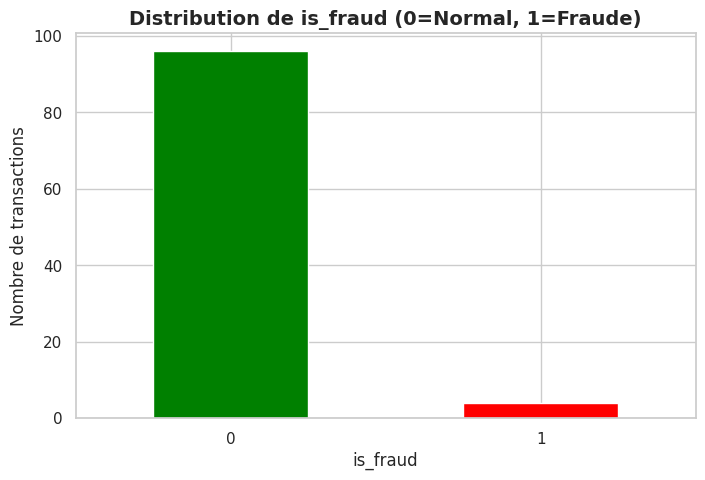

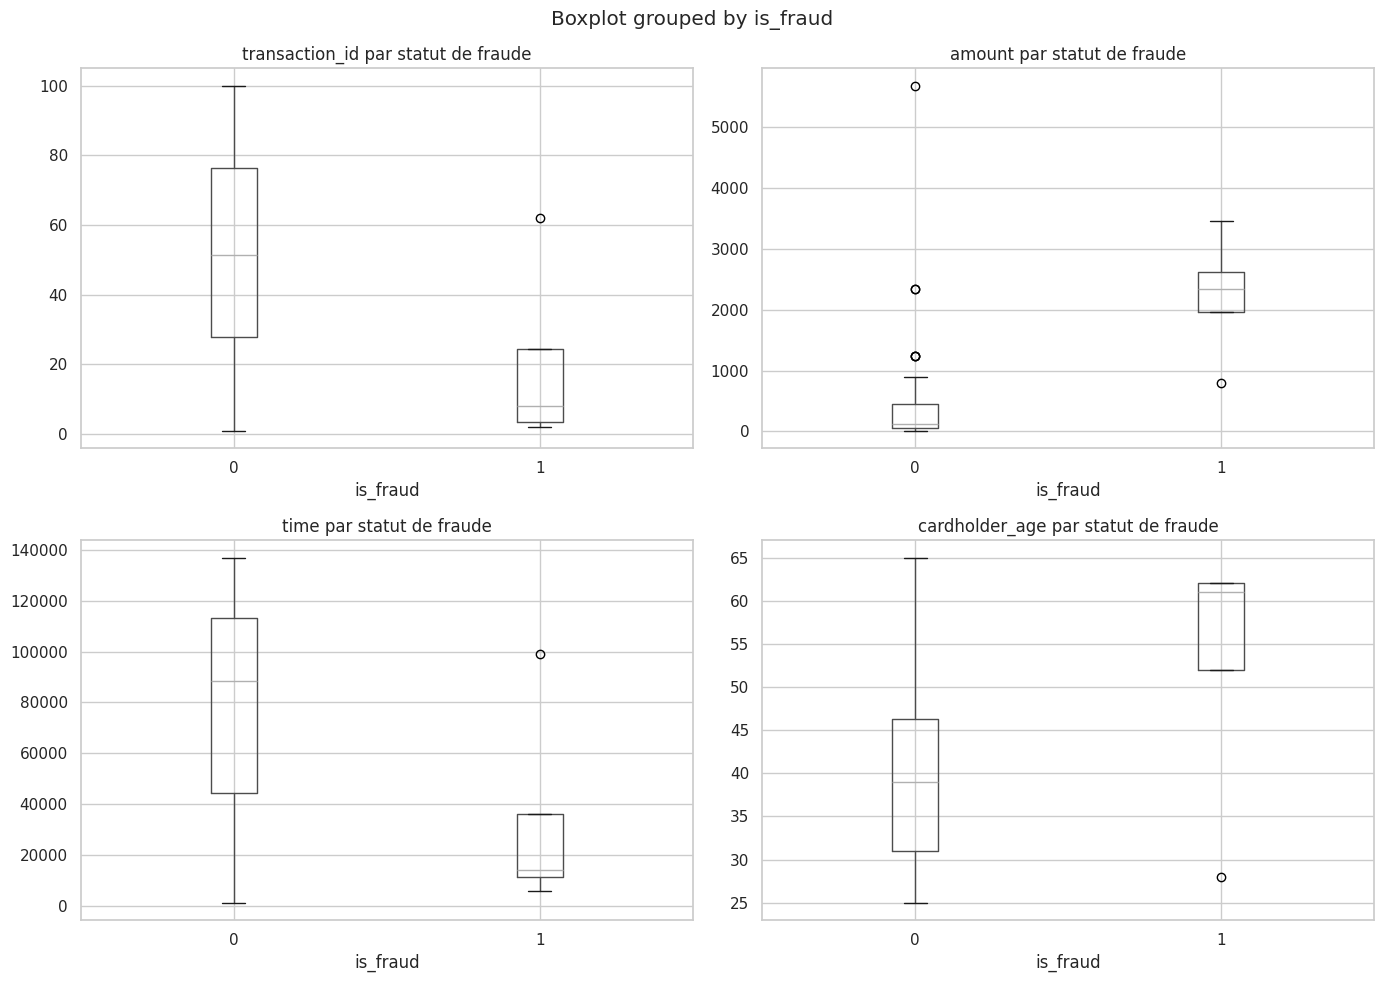

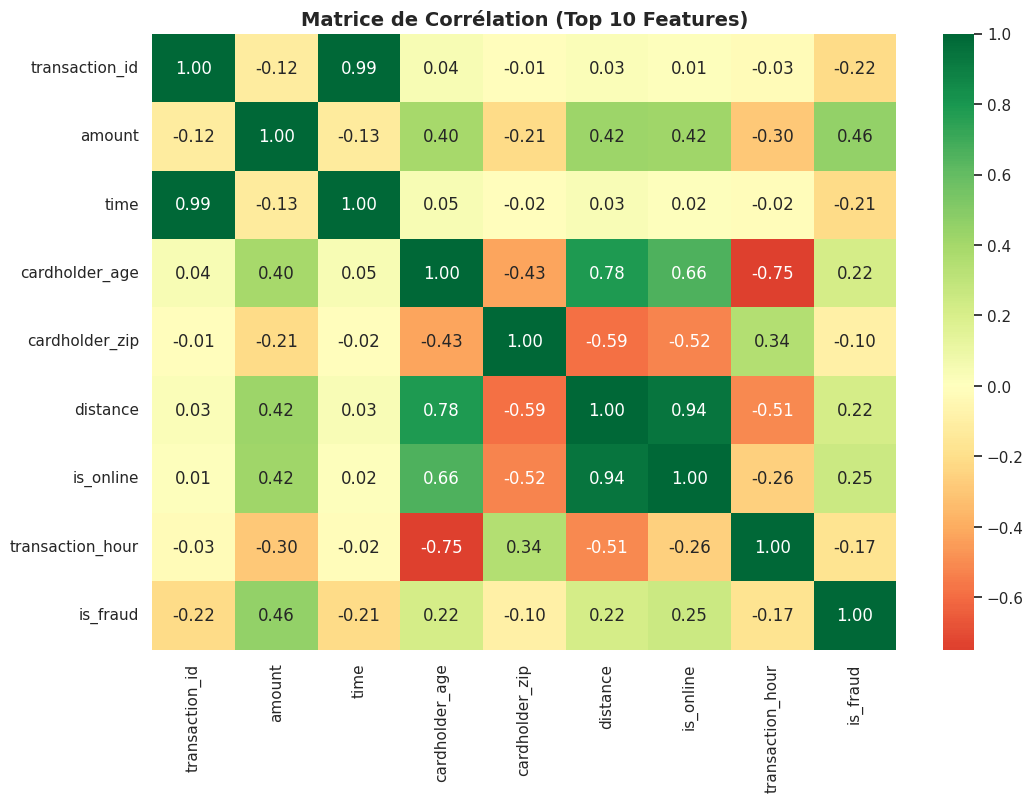



5. Nettoyage et Préparation des données

   A. Gestion des valeurs manquantes...
      Aucune valeur manquante détectée.

   B. Encodage des variables catégorielles...
      2 colonnes encodées : ['merchant_category', 'card_type']


6. Séparation des données (Train/Test)

   Ensemble d'entraînement : 80 échantillons
   Ensemble de test : 20 échantillons
   Distribution dans train : {0: 77, 1: 3}
   Distribution dans test : {0: 19, 1: 1}

   ✓ Normalisation appliquée (StandardScaler)


7. Entraînement du modèle (Random Forest Classifier)

   Entraînement en cours...
   ✓ Modèle entraîné avec succès!

   Top 10 des features les plus importantes :
             feature  importance
1             amount    0.222618
4     cardholder_age    0.178757
0     transaction_id    0.165895
6           distance    0.107425
9   transaction_hour    0.104628
2               time    0.083716
7          is_online    0.042258
5     cardholder_zip    0.041982
8          card_type    0.033752
3  merchant_cat

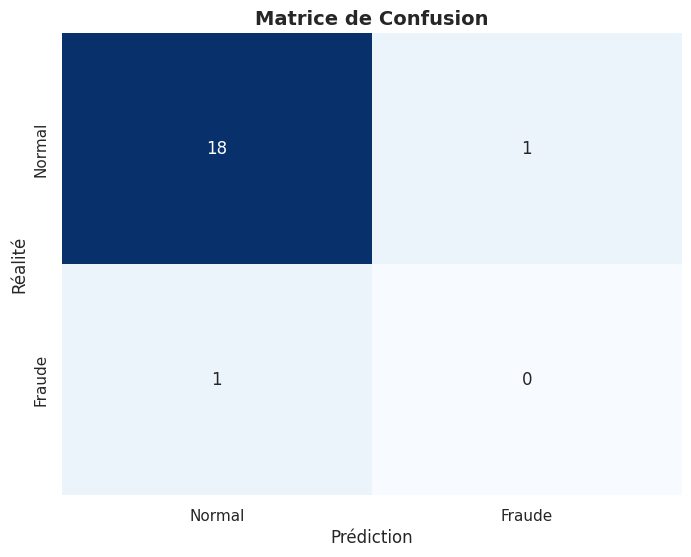

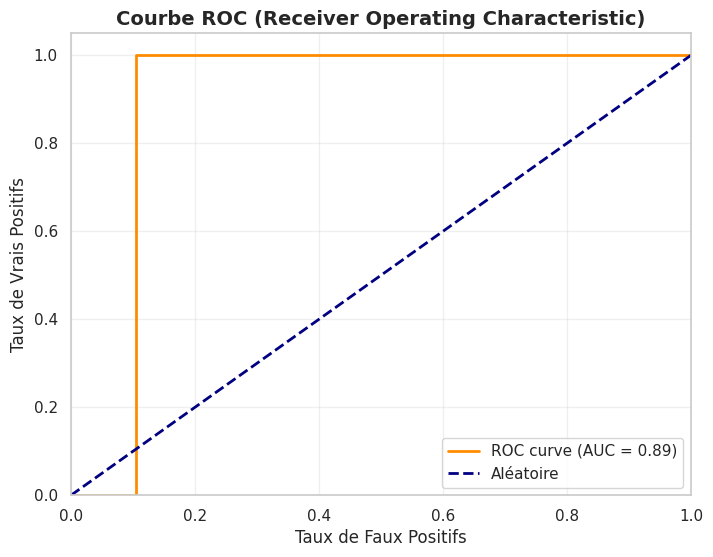

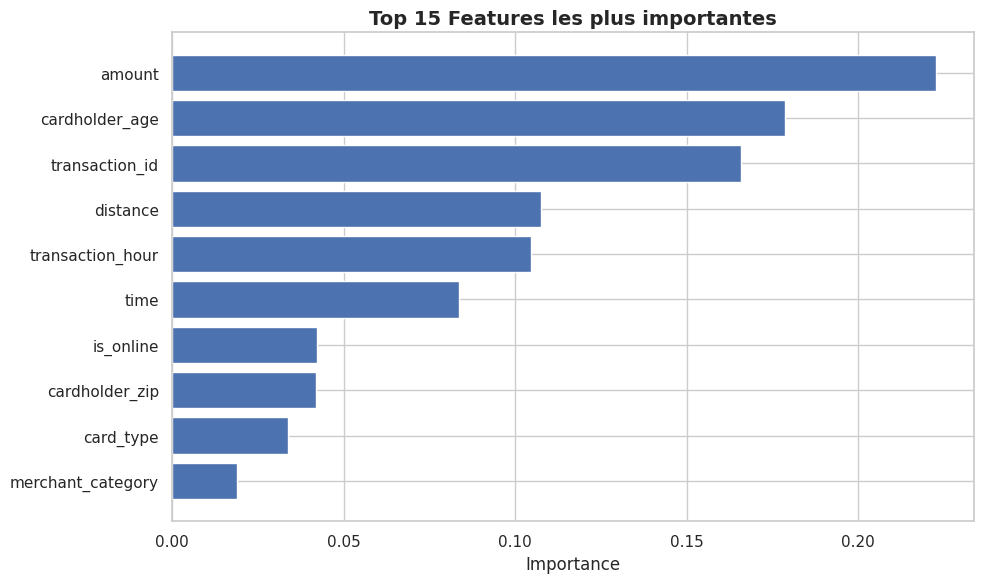


--- FIN DE L'ANALYSE ---


In [1]:
# ==============================================================================
# COURS DATA SCIENCE : DÉTECTION DE FRAUDE - CYCLE COMPLET
# Dataset : Fraud Guard Synthetic 2025
# Auteur : Votre Professeur IA
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Modules Scikit-Learn spécifiques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, roc_curve)

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("1. Bibliothèques importées avec succès.")
print("=" * 80 + "\n")

# ------------------------------------------------------------------------------
# 2. TÉLÉCHARGEMENT ET CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
print("2. Téléchargement du dataset depuis Kaggle...")

# Téléchargement du dataset
path = kagglehub.dataset_download("imaadmahmood/fraud-guard-synthetic-2025")
print(f"   Chemin du dataset : {path}")

# Exploration des fichiers disponibles
files = os.listdir(path)
print(f"   Fichiers disponibles : {files}")

# Chargement du fichier CSV (adapter le nom selon ce qui est trouvé)
csv_file = [f for f in files if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

print(f"\n   Dataset chargé avec succès!")
print(f"   Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\n   Aperçu des 5 premières lignes :")
print(df.head())
print("\n")

# ------------------------------------------------------------------------------
# 3. EXPLORATION INITIALE DES DONNÉES
# ------------------------------------------------------------------------------
print("=" * 80)
print("3. Exploration initiale des données")
print("=" * 80)

# A. Informations générales
print("\n   A. Informations sur le dataset :")
print(df.info())

# B. Statistiques descriptives
print("\n   B. Statistiques descriptives :")
print(df.describe())

# C. Vérification des valeurs manquantes
print("\n   C. Valeurs manquantes par colonne :")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct
})
print(missing_df[missing_df['Valeurs manquantes'] > 0])

# D. Distribution de la variable cible (fraude ou non)
if 'is_fraud' in df.columns or 'fraud' in df.columns or 'label' in df.columns:
    target_col = 'is_fraud' if 'is_fraud' in df.columns else ('fraud' if 'fraud' in df.columns else 'label')
    print(f"\n   D. Distribution de la variable cible '{target_col}' :")
    print(df[target_col].value_counts())
    print(f"\n   Proportion de fraudes : {df[target_col].mean()*100:.2f}%")
else:
    print("\n   ⚠ Colonne cible non identifiée automatiquement. Adapter le code.")
    target_col = None

print("\n")

# ------------------------------------------------------------------------------
# 4. VISUALISATION EXPLORATOIRE (EDA)
# ------------------------------------------------------------------------------
print("=" * 80)
print("4. Analyse Exploratoire des Données (EDA)")
print("=" * 80 + "\n")

if target_col:
    # A. Distribution de la variable cible
    plt.figure(figsize=(8, 5))
    df[target_col].value_counts().plot(kind='bar', color=['green', 'red'])
    plt.title(f"Distribution de {target_col} (0=Normal, 1=Fraude)", fontsize=14, fontweight='bold')
    plt.xlabel(target_col)
    plt.ylabel("Nombre de transactions")
    plt.xticks(rotation=0)
    plt.show()

    # B. Analyse des features numériques
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)

    if len(numeric_cols) >= 2:
        # Boxplot pour comparer fraude vs non-fraude sur quelques variables
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        for i, col in enumerate(numeric_cols[:4]):
            ax = axes[i//2, i%2]
            df.boxplot(column=col, by=target_col, ax=ax)
            ax.set_title(f"{col} par statut de fraude")
            ax.set_xlabel(target_col)
        plt.tight_layout()
        plt.show()

    # C. Matrice de corrélation
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 8))
        corr_data = df[numeric_cols[:10] + [target_col]].corr()
        sns.heatmap(corr_data, annot=True, cmap='RdYlGn', fmt=".2f", center=0)
        plt.title("Matrice de Corrélation (Top 10 Features)", fontsize=14, fontweight='bold')
        plt.show()

print("\n")

# ------------------------------------------------------------------------------
# 5. NETTOYAGE ET PRÉPARATION DES DONNÉES
# ------------------------------------------------------------------------------
print("=" * 80)
print("5. Nettoyage et Préparation des données")
print("=" * 80 + "\n")

# Copie de travail
df_clean = df.copy()

# A. Gestion des valeurs manquantes
print("   A. Gestion des valeurs manquantes...")
if df_clean.isnull().sum().sum() > 0:
    # Imputation pour les colonnes numériques
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)

    if len(numeric_cols) > 0:
        imputer = SimpleImputer(strategy='mean')
        df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

    # Pour les colonnes catégorielles, imputation par le mode
    cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

    print(f"      Imputation terminée. Valeurs manquantes restantes : {df_clean.isnull().sum().sum()}")
else:
    print("      Aucune valeur manquante détectée.")

# B. Encodage des variables catégorielles
print("\n   B. Encodage des variables catégorielles...")
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
if len(cat_cols) > 0:
    label_encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))
        label_encoders[col] = le
    print(f"      {len(cat_cols)} colonnes encodées : {cat_cols}")
else:
    print("      Aucune colonne catégorielle à encoder.")

print("\n")

# ------------------------------------------------------------------------------
# 6. SÉPARATION DES DONNÉES (Train/Test Split)
# ------------------------------------------------------------------------------
print("=" * 80)
print("6. Séparation des données (Train/Test)")
print("=" * 80 + "\n")

if target_col:
    # Séparation Features (X) et Target (y)
    X = df_clean.drop(target_col, axis=1)
    y = df_clean[target_col]

    # Split 80/20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"   Ensemble d'entraînement : {X_train.shape[0]} échantillons")
    print(f"   Ensemble de test : {X_test.shape[0]} échantillons")
    print(f"   Distribution dans train : {y_train.value_counts().to_dict()}")
    print(f"   Distribution dans test : {y_test.value_counts().to_dict()}")

    # Normalisation des features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\n   ✓ Normalisation appliquée (StandardScaler)")
else:
    print("   ⚠ Variable cible non identifiée. Impossible de continuer.")

print("\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("=" * 80)
print("7. Entraînement du modèle (Random Forest Classifier)")
print("=" * 80 + "\n")

if target_col:
    # Initialisation du modèle
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'  # Important pour les données déséquilibrées
    )

    # Entraînement
    print("   Entraînement en cours...")
    model.fit(X_train_scaled, y_train)
    print("   ✓ Modèle entraîné avec succès!")

    # Feature Importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n   Top 10 des features les plus importantes :")
    print(feature_importance.head(10))

print("\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION DES PERFORMANCES
# ------------------------------------------------------------------------------
print("=" * 80)
print("8. Évaluation des performances du modèle")
print("=" * 80 + "\n")

if target_col:
    # Prédictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # A. Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"   >>> Accuracy Score : {acc*100:.2f}%")

    # B. ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"   >>> ROC AUC Score : {roc_auc:.4f}")

    # C. Rapport de classification détaillé
    print("\n   >>> Rapport de Classification Détaillé :")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraude']))

    # D. Matrice de Confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Normal', 'Fraude'],
                yticklabels=['Normal', 'Fraude'])
    plt.xlabel('Prédiction', fontsize=12)
    plt.ylabel('Réalité', fontsize=12)
    plt.title('Matrice de Confusion', fontsize=14, fontweight='bold')
    plt.show()

    # E. Courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs', fontsize=12)
    plt.ylabel('Taux de Vrais Positifs', fontsize=12)
    plt.title('Courbe ROC (Receiver Operating Characteristic)', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    # F. Visualisation des Feature Importances
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 15 Features les plus importantes', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print("--- FIN DE L'ANALYSE ---")
print("=" * 80)